In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error as mse

In [2]:
data = pd.read_csv('Transformed_Housing_Data2.csv')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
sale_price = data["Sale_Price"].head(30)
flat_area = data['Flat Area (in Sqft)'].head(30)
sample_data = pd.DataFrame({'sale_price' : sale_price,
                            'flat_area' : flat_area})


In [7]:
sample_data.head()
#sale_price.shape
#flat_area.shape

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0


In [8]:
def param_init(Y):
    '''
    Y = Target Variable
    returns initialized values of m and c
    '''
    m = 0.1
    c = Y.mean()
    return m, c

In [9]:
def generate_predictions(m, c, X):
    '''
    x = Independant Variable
    returns prediction generated by line with parameters m, c
    '''
    prediction = []
    for x in X:
        pred = (m*x) + c
        prediction.append(pred)
        return prediction

In [10]:
def compute_cost(prediction, Y):
    '''
    returns the mean_squared_error between prediction and Y
    '''
    cost = np.sum(((prediction - Y)**2)/len(Y))
    return cost

In [11]:
def gradients(prediction, Y, X):
    '''
    Returns Gradients corresponding to m and c
    '''
    n = len(Y)
    Gm = 2/n * np.sum((prediction - Y)*X)
    Gc = 2/n * np.sum((prediction - Y))
    return Gm, Gc

In [12]:
def param_update(m_old, c_old, Gm_old, Gc_old, alpha):
    '''
    Update and return the new values of m and c
    '''
    m_new = m_old - alpha * Gm_old
    c_new = c_old - alpha * Gc_old
    return m_new, c_new

In [13]:
def result(m, c, X, Y, cost, predictions, i):
    '''
    Print and plot the final result obtained from gradient descent
    '''
    ##If the Gradient Descent converged to the optimum value before max_iter
    if i < max_iter - 1:
        print("*****Gradient Descent has converged at iteration {}*****".format(i))
    else:
        print("*****Result after", max_iter,'iteration is : *****')
        
    ##Plotting the final result
    plt.figure(figsize = (14,7), dpi = 120)
    plt.scatter(X, Y, color = 'red', label = 'data points')
    label = 'Final Regression Line : m = {}; c = {}'.format(str(m), str(c))
    plt.plot(X, predictions, color = 'green', label = label)
    plt.xlabel('Flat Area')
    plt.ylabel('Sale_Price')
    plt.title('Final Regression Line')
    plt.legend()

After Iteration 0 :m = 3503716.32888889 ;c =  466000.9733333333 ;cost =  64212988371.22223
After Iteration 20 :m = 6.0493718245235865e+99 ;c =  3.1099503853261513e+96 ;cost =  2.4180531967813136e+196
After Iteration 40 :m = 1.0444827786775503e+193 ;c =  5.369631284436042e+189 ;cost =  inf
After Iteration 60 :m = 1.8034009259133135e+286 ;c =  9.271189748504738e+282 ;cost =  inf
After Iteration 80 :m = nan ;c =  nan ;cost =  nan
After Iteration 100 :m = nan ;c =  nan ;cost =  nan
After Iteration 120 :m = nan ;c =  nan ;cost =  nan
After Iteration 140 :m = nan ;c =  nan ;cost =  nan
After Iteration 160 :m = nan ;c =  nan ;cost =  nan
After Iteration 180 :m = nan ;c =  nan ;cost =  nan
After Iteration 200 :m = nan ;c =  nan ;cost =  nan
After Iteration 220 :m = nan ;c =  nan ;cost =  nan
After Iteration 240 :m = nan ;c =  nan ;cost =  nan
After Iteration 260 :m = nan ;c =  nan ;cost =  nan
After Iteration 280 :m = nan ;c =  nan ;cost =  nan
After Iteration 300 :m = nan ;c =  nan ;cost =  n

/var/folders/r_/dmgv9h0x3k7610rhwr96d_cc0000gn/T/ipykernel_93078/1176665673.py:5: RuntimeWarning: overflow encountered in square
  cost = np.sum(((prediction - Y)**2)/len(Y))
/var/folders/r_/dmgv9h0x3k7610rhwr96d_cc0000gn/T/ipykernel_93078/2677063984.py:22: RuntimeWarning: invalid value encountered in double_scalars
  if abs(cost_new - cost_old < 10**(-7)):
/var/folders/r_/dmgv9h0x3k7610rhwr96d_cc0000gn/T/ipykernel_93078/3061353593.py:6: RuntimeWarning: overflow encountered in multiply
  Gm = 2/n * np.sum((prediction - Y)*X)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/r_/dmgv9h0x3k7610rhwr96d_cc0000gn/T/ipykernel_93078/598694179.py:5: RuntimeWarning: invalid value encountered in double_scalars
  m_new = m_old - alpha * Gm_old
/var/folders/r_/dmgv9h0x3k7610rhwr96d_cc0000gn/T/ipykernel_93078/598694179.py:6: RuntimeWarning: invalid value encou

ValueError: x and y must have same first dimension, but have shapes (30, 1) and (1, 1)

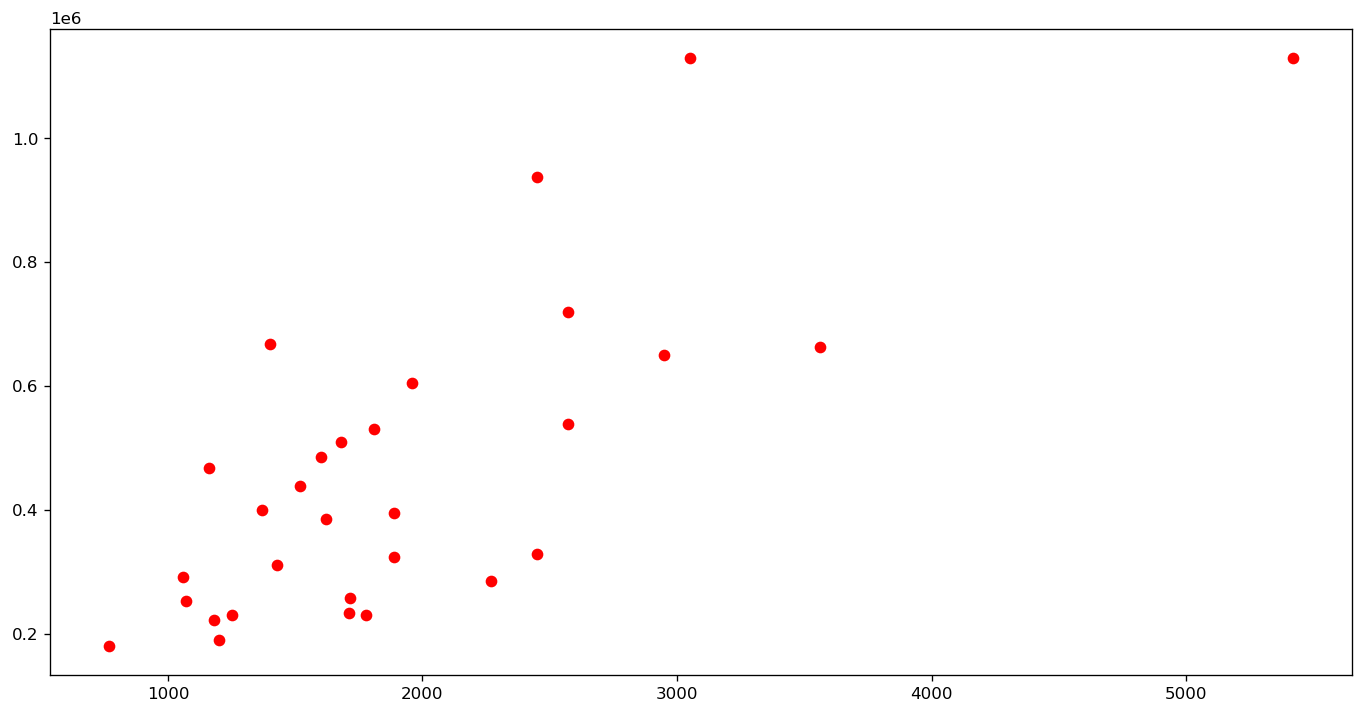

In [16]:
##defining and reshaping the dataset
sale_price = sample_data['sale_price'].values.reshape(-1,1)
flat_area = sample_data['flat_area'].values.reshape(-1,1)

##Declaring Parameters
max_iter = 1000
cost_old = 0
alpha = 0.01

##Step 1 : Initializing the values of m, c
m, c = param_init(sale_price)

##Gradient Descent in action
for i in range (0, max_iter):
    ##Step 2 : Generating Predictions
    predictions = generate_predictions(m, c, flat_area)
    
    ##Step 3 : Calculating Cost
    cost_new = compute_cost(predictions, sale_price)
    
    ##Checking if GD Converged
    if abs(cost_new - cost_old < 10**(-7)):
        break
    ##Calculating Gradients
    Gm, Gc = gradients(predictions, sale_price, flat_area)
    
    ##Step 4 : updating parameters m and c
    m, c = param_update(m, c, Gm, Gc, alpha)
    
    ##display result after every 20 iterations
    if i%20 == 0:
        print('After Iteration', i, ':m =', m,';c = ', c,';cost = ',cost_new)
        
    ##Updating cost_old
    cost_old = cost_new
    
##Final Results
result(m, c, flat_area, sale_price, cost_new, predictions, i)

After Iteration 0 : m = 0.11516346413633304 ; c = 0.001676093694654415 ; Cost = 1.0070232251831501
After Iteration 20 : m = 0.41843274686299353 ; c = 0.07615598713395737 ; Cost = 1.0713667039292152
After Iteration 40 : m = 0.7217020295896547 ; c = 0.21035807682868063 ; Cost = 1.151745498191901
After Iteration 60 : m = 1.024971312316316 ; c = 0.384431180834245 ; Cost = 1.2220862787610673
After Iteration 80 : m = 1.3282405950429752 ; c = 0.5851224918356879 ; Cost = 1.2764802960837531
After Iteration 100 : m = 1.6315098777696344 ; c = 0.8035843300214061 ; Cost = 1.316107490839628
After Iteration 120 : m = 1.9347791604962936 ; c = 1.0339099138176375 ; Cost = 1.344039667869063
After Iteration 140 : m = 2.238048443222956 ; c = 1.2721558287583226 ; Cost = 1.3633455981719562
After Iteration 160 : m = 2.54131772594962 ; c = 1.515689419909985 ; Cost = 1.3765277450216236
After Iteration 180 : m = 2.8445870086762834 ; c = 1.7627531058521566 ; Cost = 1.3854589992849242
After Iteration 200 : m = 3.1

ValueError: x and y must have same first dimension, but have shapes (30, 1) and (1, 1)

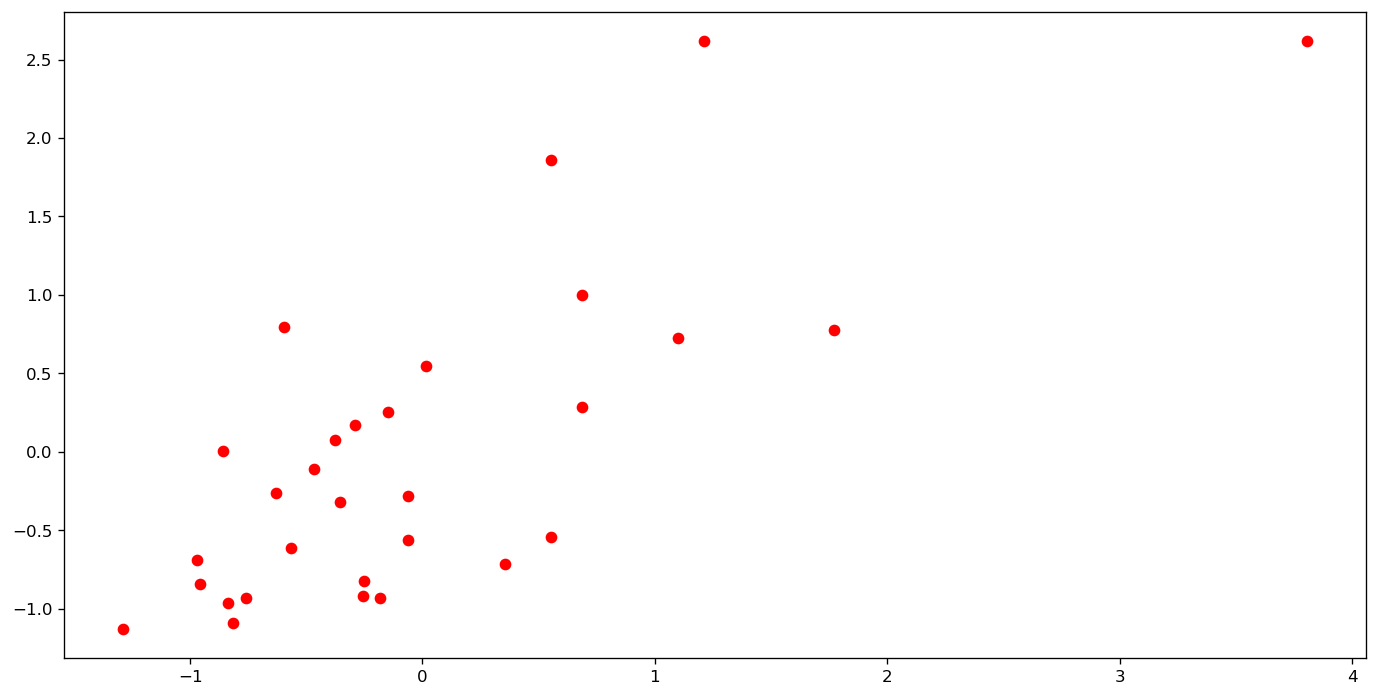

In [15]:
## scaling the dataset using the standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sale_price = scaler.fit_transform(sample_data['sale_price'].values.reshape(-1,1))
flat_area = scaler.fit_transform(sample_data['flat_area'].values.reshape(-1,1))

## declaring parameters
max_iter = 1000
cost_old = 0
alpha = 0.01

## Step 1: inititialising the values of m, c
m , c = param_init(sale_price)

## Gradient Descent in action
for i in range(0 , max_iter):
  
  ## Step 2: genrating predictions
  predictions = generate_predictions(m , c , flat_area)

  ## Step 3: calculating cost
  cost_new = compute_cost(predictions , sale_price)

  ## checking if GD converged
  if abs(cost_new - cost_old) < 10**(-7):
    break
  
  ## calculating gradients
  Gm, Gc = gradients(predictions, sale_price,
                     flat_area)
  
  ## Step 4: updating parameters m and c
  m, c = param_update(m, c, Gm, Gc, alpha)

  ## display result after every 20 iterations
  if i%20 == 0:
    print('After Iteration', i,': m =', m, '; c =', c,'; Cost =', cost_new)
  ##updating cost_old
  cost_old = cost_new

## final results
result(m , c, flat_area, sale_price,
       cost_new, predictions, i)

In [19]:
sample_data.sale_price

0      221900.0
1      538000.0
2      180000.0
3      604000.0
4      510000.0
5     1129575.0
6      257500.0
7      291850.0
8      229500.0
9      323000.0
10     662500.0
11     468000.0
12     310000.0
13     400000.0
14     530000.0
15     650000.0
16     395000.0
17     485000.0
18     189000.0
19     230000.0
20     385000.0
21    1129575.0
22     285000.0
23     252700.0
24     329000.0
25     233000.0
26     937000.0
27     667000.0
28     438000.0
29     719000.0
Name: sale_price, dtype: float64

In [21]:
sample_data.flat_area

0     1180.0
1     2570.0
2      770.0
3     1960.0
4     1680.0
5     5420.0
6     1715.0
7     1060.0
8     1780.0
9     1890.0
10    3560.0
11    1160.0
12    1430.0
13    1370.0
14    1810.0
15    2950.0
16    1890.0
17    1600.0
18    1200.0
19    1250.0
20    1620.0
21    3050.0
22    2270.0
23    1070.0
24    2450.0
25    1710.0
26    2450.0
27    1400.0
28    1520.0
29    2570.0
Name: flat_area, dtype: float64